# A General Theory for Stock Dynamics of Populations and Built and Natural Environments
by Dirk Lauinger, Romain G. Billy, Felipe Vásquez, Daniel B. Müller

Data analysis for Figures 5

Original version by the authors: 04 February 2021 (Available at https://zenodo.org/record/4501502#.YXOy-ByxXb0)

Simplified and explained version by Matteo Barsanti: 22 October 2021 (Exercise session 4 of the course ENV-501)



## Lifetime vs. death rate

Figure 5 compares the evolution of in- and outflows under a constant lifetime and a constant death rate, equal to the inverse of the lifetime, for a model with logistic stock growth. 

In [1]:
# -- import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

In [2]:
# -- define the in- and outflows as a function of the stock and the death rate or the lifetime

# death rate approach
# Outputs
def Od(S, d):
    # d: death rate per period (1/time)
    return d*S[1:] # d * S = O 
# Inputs
def Id(S, d):
    dS = np.diff(S)   # calculate stock change  
    return dS + Od(S, d) # 𝚫S + O = I
# np.diff calculate the difference between two consecuite elements of an array
# np.diff([S1, S2, S3, S4]) = [S2-S1, S3-S2, S4-S3]  

# lifetime approach
# Inputs
def IL(S, L):
    # L: lifetime matrix
    dS = np.diff(S)   # calculate stock change
    # apply Equation (8): I − O = I − IL = I (𝕀 − L) = 𝚫S
    return np.linalg.solve(np.identity(len(L)) - L, dS)
# np.linalg.solve solve a linear matrix equation, or system of linear scalar equations.
# If X is unkown and A*X = B, then np.linalg.solve(A, B) = X
# Outputs
def OL(S, L):
    dS = np.diff(S)   # calculate stock change
    return IL(S, L) - dS # I - 𝚫S = O

In [3]:
# -- define problem parameters 
N = 100               # length of planning horizon (periods)
k = 15                # shape factor for the logistic stock growth (1/time)
m = 0.5               # mean value of the logistic function (time)
dt = 1/N              # duration of each period (time)
d = 0.1               # death rate per period (1/time)
L_exp = 10*dt         # mean lifetime (time)
L_std = 3*dt          # standard deviation (time)

# define lifetime function: truncated normal distribution in this case (needs normalization)
def normal(x, mu, std):
    return np.exp( -((x - mu)/std)**2/2 )/(std*np.sqrt(2*np.pi))

# build lifetime matrix
L = np.zeros((N,N))
for n in range(N):
    L = L + np.diag(np.ones(N - n)*normal(n*dt, L_exp, L_std), k = -n)
# normalize
L = L/L[:,0].sum()
# time-steps
t = np.arange(0,1.01,dt)
# stock evolution
S = 1/(1 + np.exp(-k*(t-m)))

# print the lifetime matrixes normalized
np.set_printoptions(suppress=True, precision=3, threshold=np.inf)
print("The lifetime matrixes printed: \n", L)

The lifetime matrixes printed: 
 [[0.001 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.   ]
 [0.001 0.001 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0. 

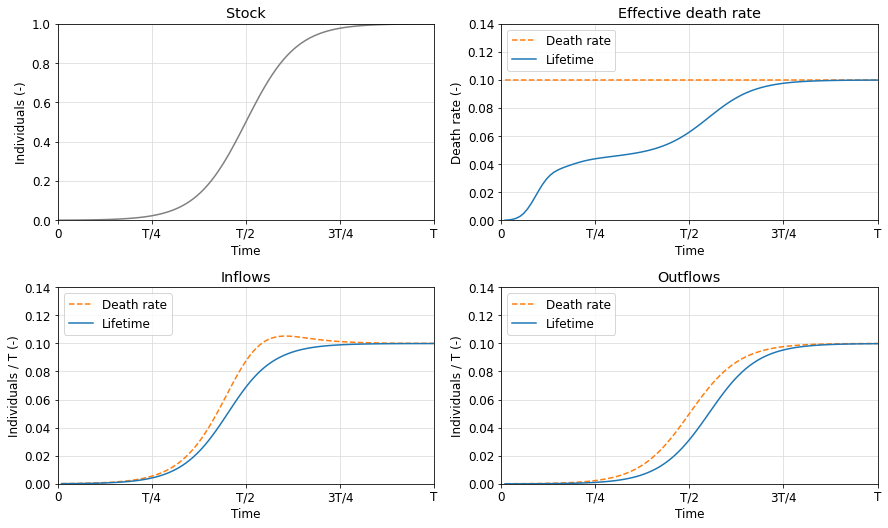

In [4]:
# -- plot the figure
fig = plt.figure(figsize = (12.5, 7.5))
plt.rcParams.update({'font.size': 12})
# Stock
ax1 = plt.subplot(221, fc = 'w')
plt.plot(t, S, color='grey')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xticks([0, 0.25, 0.5, 0.75, 1], [0, 'T/4', 'T/2', '3T/4', 'T'])
plt.xlabel('Time')
plt.ylabel('Individuals (-)')
plt.title('Stock')
plt.grid(color='gainsboro')
# Effective Death Rate
ax2 = plt.subplot(222, facecolor = 'w')
plt.plot(t[1:], Od(S, d)/S[1:], linestyle = '--', color = 'tab:orange', label = 'Death rate')
plt.plot(t[1:], OL(S, L)/S[1:], linestyle = '-',  color = 'tab:blue', label = 'Lifetime')
plt.legend(facecolor = 'w', fontsize = '12', loc = 'upper left')
plt.xlim([0, 1])
plt.ylim([0, 0.14])
plt.xticks([0, 0.25, 0.5, 0.75, 1], [0, 'T/4', 'T/2', '3T/4', 'T'])
plt.xlabel('Time')
plt.ylabel('Death rate (-)')
plt.title('Effective death rate')
plt.grid(color='gainsboro')
# Inflows
ax3 = plt.subplot(223, facecolor = 'w')
plt.plot(t[1:], Id(S, d), '--', label = 'Death rate', color = 'tab:orange')
plt.plot(t[1:], IL(S, L), label='Lifetime', color = 'tab:blue')
plt.legend(facecolor = 'w', fontsize = '12', loc = 'upper left')
plt.xlim([0, 1])
plt.ylim([0, 0.14])
plt.xticks([0, 0.25, 0.5, 0.75, 1], [0, 'T/4', 'T/2', '3T/4', 'T'])
plt.xlabel('Time')
plt.ylabel('Individuals / T (-)')
plt.title('Inflows')
plt.grid(color='gainsboro')
# Outflows
ax4 = plt.subplot(224, facecolor = 'w')
plt.plot(t[1:], Od(S, d), '--', color = 'tab:orange', label = 'Death rate')
plt.plot(t[1:], OL(S, L), label='Lifetime', color = 'tab:blue')
plt.legend(facecolor = 'w', fontsize = '12', loc = 'upper left')
plt.xlim([0, 1])
plt.ylim([0, 0.14])
plt.xticks([0, 0.25, 0.5, 0.75, 1], [0, 'T/4', 'T/2', '3T/4', 'T'])
plt.xlabel('Time')
plt.ylabel('Individuals / T (-)')
plt.title('Outflows')
plt.grid(color='gainsboro')
# optimize layout
fig.tight_layout()
#fig.savefig('Death_Rate_vs_Lifetime.pdf',bbox_inches='tight')
fig.savefig('Death_Rate_vs_Lifetime.png',bbox_inches='tight', dpi=600)

### Paste here your changes

In [5]:
# -- define new problem parameters 
d_new = 0.1               # death rate per period (1/time)
L_exp_new = 10*dt         # mean lifetime (time)
L_std_new = 3*dt          # standard deviation (time)


# build lifetime matrix
L_new = np.zeros((N,N))
for n in range(N):
    L_new = L_new + np.diag(np.ones(N - n)*normal(n*dt, L_exp_new, L_std_new), k = -n)
# normalize
L_new = L_new/L_new[:,0].sum()
# stock evolution
S_new = 1/(1 + np.exp(-k*(t-m)))

# print the lifetime matrixes normalized
print("The new lifetime matrixes printed: \n", L_new)

The new lifetime matrixes printed: 
 [[0.001 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.   ]
 [0.001 0.001 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.   

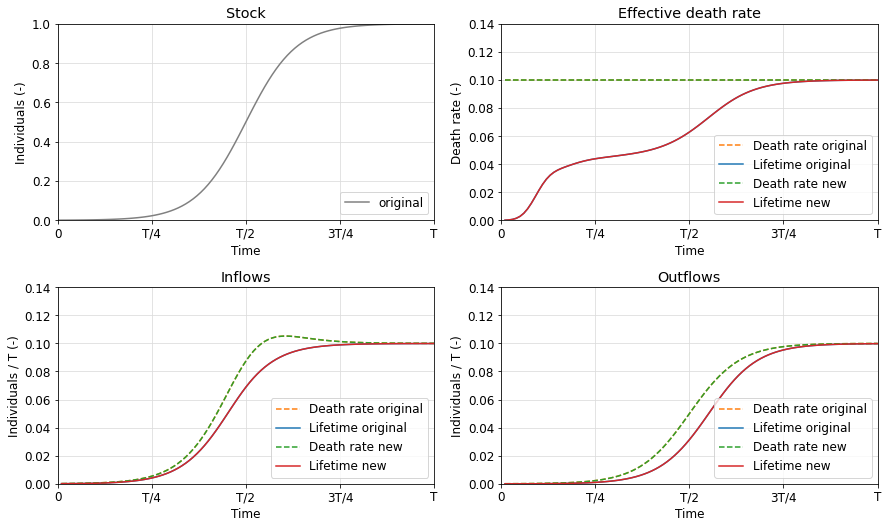

In [6]:
# -- plot the figure
fig = plt.figure(figsize = (12.5, 7.5))
plt.rcParams.update({'font.size': 12})
# Stock
ax1 = plt.subplot(221, fc = 'w')
plt.plot(t, S, color='grey', label= 'original')
#plt.plot(t, S_new, color='r', label= 'new')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xticks([0, 0.25, 0.5, 0.75, 1], [0, 'T/4', 'T/2', '3T/4', 'T'])
plt.xlabel('Time')
plt.ylabel('Individuals (-)')
plt.title('Stock')
plt.grid(color='gainsboro')
plt.legend(facecolor = 'w', fontsize = '12', loc = 'lower right')
# Effective Death Rate
ax2 = plt.subplot(222, facecolor = 'w')
plt.plot(t[1:], Od(S, d)/S[1:], linestyle = '--', color = 'tab:orange', label = 'Death rate original')
plt.plot(t[1:], OL(S, L)/S[1:], linestyle = '-',  color = 'tab:blue', label = 'Lifetime original')
plt.plot(t[1:], Od(S_new, d_new)/S_new[1:], linestyle = '--', color = 'tab:green', label = 'Death rate new')
plt.plot(t[1:], OL(S_new, L_new)/S_new[1:], linestyle = '-',  color = 'tab:red', label = 'Lifetime new')
plt.legend(facecolor = 'w', fontsize = '12', loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 0.14])
plt.xticks([0, 0.25, 0.5, 0.75, 1], [0, 'T/4', 'T/2', '3T/4', 'T'])
plt.xlabel('Time')
plt.ylabel('Death rate (-)')
plt.title('Effective death rate')
plt.grid(color='gainsboro')
# Inflows
ax3 = plt.subplot(223, facecolor = 'w')
plt.plot(t[1:], Id(S, d), '--', label = 'Death rate original', color = 'tab:orange')
plt.plot(t[1:], IL(S, L), label='Lifetime original', color = 'tab:blue')
plt.plot(t[1:], Id(S_new, d_new), '--', label = 'Death rate new', color = 'tab:green')
plt.plot(t[1:], IL(S_new, L_new), label='Lifetime new', color = 'tab:red')
plt.legend(facecolor = 'w', fontsize = '12', loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 0.14])
plt.xticks([0, 0.25, 0.5, 0.75, 1], [0, 'T/4', 'T/2', '3T/4', 'T'])
plt.xlabel('Time')
plt.ylabel('Individuals / T (-)')
plt.title('Inflows')
plt.grid(color='gainsboro')
# Outflows
ax4 = plt.subplot(224, facecolor = 'w')
plt.plot(t[1:], Od(S, d), '--', color = 'tab:orange', label = 'Death rate original')
plt.plot(t[1:], OL(S, L), label='Lifetime original', color = 'tab:blue')
plt.plot(t[1:], Od(S_new, d_new), '--', color = 'tab:green', label = 'Death rate new')
plt.plot(t[1:], OL(S_new, L_new), label='Lifetime new', color = 'tab:red')
plt.legend(facecolor = 'w', fontsize = '12', loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 0.14])
plt.xticks([0, 0.25, 0.5, 0.75, 1], [0, 'T/4', 'T/2', '3T/4', 'T'])
plt.xlabel('Time')
plt.ylabel('Individuals / T (-)')
plt.title('Outflows')
plt.grid(color='gainsboro')
# optimize layout
fig.tight_layout()
#fig.savefig('Death_Rate_vs_Lifetime_new.pdf',bbox_inches='tight')
fig.savefig('Death_Rate_vs_Lifetime_new.png',bbox_inches='tight', dpi=600)